# Example 5-1

Linear regression on a categorical variable using one-hot and dummy
codes

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.DataFrame({'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC', 'Seattle', 'Seattle', 'Seattle'],
                   'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]})
df

,City,Rent
0,SF,3999
1,SF,4000
2,SF,4001
3,NYC,3499
4,NYC,3500
5,NYC,3501
6,Seattle,2499
7,Seattle,2500
8,Seattle,2501


In [3]:
df['Rent'].mean()

3333.3333333333335

In [4]:
# Convert the categorical variables in the DataFrame to one-hot encoding
# and fit a linear regression model
one_hot_df = pd.get_dummies(df, prefix=['city'])
one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,0,1,0
1,4000,0,1,0
2,4001,0,1,0
3,3499,1,0,0
4,3500,1,0,0
5,3501,1,0,0
6,2499,0,0,1
7,2500,0,0,1
8,2501,0,0,1


In [5]:
lin_reg_ohe = LinearRegression()

In [6]:
lin_reg_ohe.fit(one_hot_df[['city_NYC', 'city_SF', 'city_Seattle']], one_hot_df['Rent'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
lin_reg_ohe.coef_

array([ 166.66666667,  666.66666667, -833.33333333])

In [8]:
lin_reg_ohe.intercept_

3333.3333333333335

In [9]:
# Train a linear regression model on dummy code
# Specify the 'drop_first' flag to get dummy coding
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df

,Rent,city_SF,city_Seattle
0,3999,1,0
1,4000,1,0
2,4001,1,0
3,3499,0,0
4,3500,0,0
5,3501,0,0
6,2499,0,1
7,2500,0,1
8,2501,0,1


In [10]:
lin_reg_dummy = LinearRegression()

In [11]:
lin_reg_dummy.fit(dummy_df[['city_SF', 'city_Seattle']], dummy_df['Rent'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lin_reg_dummy.coef_

array([  500., -1000.])

In [13]:
lin_reg_dummy.intercept_

3500.0000000000005

# Example 5-2

Linear regression with effect coding

In [14]:
effect_df = dummy_df.copy()

In [15]:
effect_df.loc[3:5, ['city_SF', 'city_Seattle']] = -1.0
effect_df

,Rent,city_SF,city_Seattle
0,3999,1.0,0.0
1,4000,1.0,0.0
2,4001,1.0,0.0
3,3499,-1.0,-1.0
4,3500,-1.0,-1.0
5,3501,-1.0,-1.0
6,2499,0.0,1.0
7,2500,0.0,1.0
8,2501,0.0,1.0


In [16]:
lin_reg_effect = LinearRegression()

In [17]:
lin_reg_effect.fit(effect_df[['city_SF', 'city_Seattle']], effect_df['Rent'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lin_reg_effect.coef_

array([ 666.66666667, -833.33333333])

In [19]:
lin_reg_effect.intercept_

3333.3333333333335

# Illustration of rental price in cities

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", 
        font_scale=1.4, 
        color_codes=True)

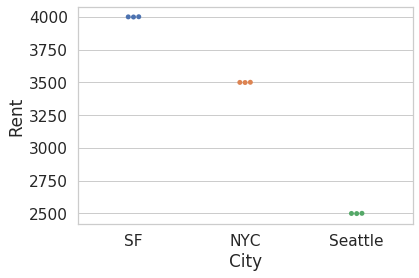

In [21]:
sns.swarmplot(x="City", y="Rent", data=df)
plt.show()

In [22]:
print(f'One-hot encoding weights: {lin_reg_ohe.coef_} and intercept: {lin_reg_ohe.intercept_}')
print(f'Dummy encoding weights: {lin_reg_dummy.coef_} and intercept: {lin_reg_dummy.intercept_}')
print(f'Effect coding weights: {lin_reg_effect.coef_} and intercept: {lin_reg_effect.intercept_}')

One-hot encoding weights: [ 166.66666667  666.66666667 -833.33333333] and intercept: 3333.3333333333335
Dummy encoding weights: [  500. -1000.] and intercept: 3500.0000000000005
Effect coding weights: [ 666.66666667 -833.33333333] and intercept: 3333.3333333333335


# OHE vs Dummy encoding vs Effect coding

y = X.dot(weight) + intercept

In [23]:
lin_reg_ohe.predict(one_hot_df[['city_NYC', 'city_SF', 'city_Seattle']])

array([4000., 4000., 4000., 3500., 3500., 3500., 2500., 2500., 2500.])

In [24]:
lin_reg_dummy.predict(dummy_df[['city_SF', 'city_Seattle']])

array([4000., 4000., 4000., 3500., 3500., 3500., 2500., 2500., 2500.])

In [25]:
lin_reg_effect.predict(effect_df[['city_SF', 'city_Seattle']])

array([4000., 4000., 4000., 3500., 3500., 3500., 2500., 2500., 2500.])